In [2]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

def imshow(tit, image) :
    plt.figure(figsize=(12,12))
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

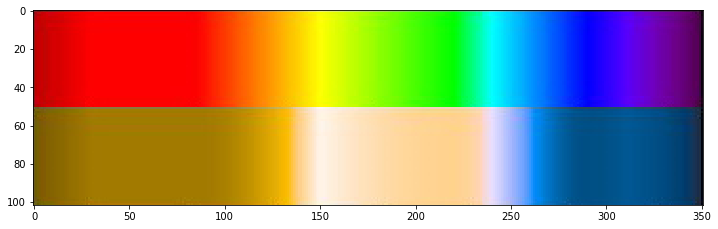

(51, 351, 3)
(51, 351, 3)


In [8]:
norm = cv2.imread('normal.png')
deut = cv2.imread('normal02.png')
imshow('',np.vstack((norm,deut)))
print(norm.shape)
print(deut.shape)


In [27]:
norm_b = norm[:,:,0]
norm_g = norm[:,:,1]
norm_r = norm[:,:,2]

deut_b = deut[:,:,0]
deut_g = deut[:,:,1]
deut_r = deut[:,:,2]

print(norm_b.dtype)
print(deut_b.dtype)
dst_b = norm_b - deut_b
print(norm_b)
print(deut_b)
print(dst_b)

uint8
uint8
[[55 40 26 ... 62 39 13]
 [20 19 18 ... 77 53 24]
 [24 17  6 ... 69 55 15]
 ...
 [29 24 15 ... 68 61 28]
 [15 10  3 ... 61 45 14]
 [11  6  0 ... 69 51 20]]
[[65 34 29 ... 63 57 29]
 [21 12  7 ... 77 63 14]
 [36  9  0 ... 67 63 25]
 ...
 [37 20  0 ... 56 66 24]
 [26 27  7 ... 55 61 19]
 [34 20  0 ... 59 63 14]]
[[246   6 253 ... 255 238 240]
 [255   7  11 ...   0 246  10]
 [244   8   6 ...   2 248 246]
 ...
 [248   4  15 ...  12 251   4]
 [245 239 252 ...   6 240 251]
 [233 242   0 ...  10 244   6]]


In [19]:
norm_h = norm_hsv[:,:,0]
deut_h = deut_hsv[:,:,0]
print(norm_h)
print(deut_h)

[[120 131 125 ...  53  55  65]
 [126 128 127 ...  64  65  91]
 [ 45 127 125 ...  63  61  54]
 ...
 [120 124 124 ...  52  73  73]
 [ 50 129  54 ...  69  87  81]
 [ 50  54  53 ...  58  70  82]]
[[ 20  26  24 ... 103 105 110]
 [ 24  25  25 ... 107 108 120]
 [ 23  25  24 ... 107 107 104]
 ...
 [ 21  22  23 ... 103 114 114]
 [ 26  26  27 ... 112 122 120]
 [ 26  27  27 ... 105 112 118]]


In [17]:
dst_h = deut_h - norm_h
print(dst_h)
print(dst_h.shape)

[[120 131 125 ...  53  55  65]
 [126 128 127 ...  64  65  91]
 [ 45 127 125 ...  63  61  54]
 ...
 [120 124 124 ...  52  73  73]
 [ 50 129  54 ...  69  87  81]
 [ 50  54  53 ...  58  70  82]]
(51, 351)


(51, 351, 3)


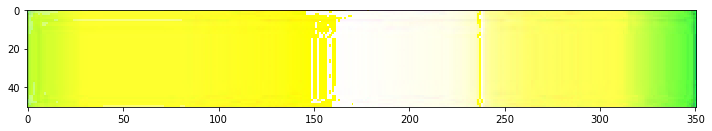

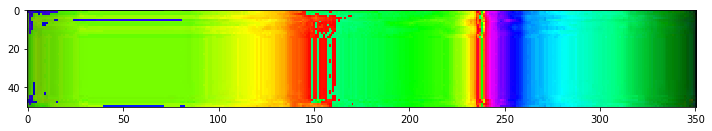

In [18]:
norm_hsv[:,:,0] = dst_h
# print(norm_hsv)
print(norm_hsv.shape)
imshow('',norm_hsv)
norm_bgr = cv2.cvtColor(norm_hsv, cv2.COLOR_HSV2BGR)
imshow('', norm_bgr)

(512, 512, 3)


In [12]:
try:
    cap = cv2.VideoCapture(0)
    print('camera on')
except:
    print('fail')
    
    

lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
# img_mask = cv2.inRange(img_hsv, lower_red, upper_red)

while(1):

    ret, frame = cap.read()
    
    
#     img_blur = cv2.GaussianBlur(frame, (5,5), 5)
#     img_hsv = cv2.cvtColor(img_blur, cv2.COLOR_BGR2HSV)
#     img_mask = cv2.inRange(img_hsv, lower_red, upper_red)
#     img_Canny = cv2.Canny(img_blur, 50, 100)
#     lines = cv2.HoughLinesP(img_Canny, 1, math.pi / 180, 100, minLineLength = 50, maxLineGap=5)
    
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])
        pt2 = (lines[i][0][2], lines[i][0][3])
        cv2.line(frame, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)
    
    
    cv2.imshow('src', frame)
#     cv2.imshow('dst', img_Canny)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

camera on


In [7]:
try:
    cap = cv2.VideoCapture(0)
    print('camera on')
except:
    print('fail')
    

lower_red = (-10, 100, 100)
upper_red = (10, 255, 255)

lower_orange = (10, 100, 100)
upper_orange = (25, 255, 255)

lower_yellow = (25, 100, 100)
upper_yellow = (35, 255, 255)

lower_green = (35, 100, 100)
upper_green = (75, 255, 255)


kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))

canny_min = 100
canny_max = 150

while(1):

    ret, frame = cap.read()
    
    blur = cv2.GaussianBlur(frame, (7,7), 7)
    hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
    
    # inRange
    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_orange = cv2.inRange(hsv, lower_orange, upper_orange)
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    
    # bitwise_and
    red_object = cv2.bitwise_and(frame, frame, mask = mask_red)
    orange_object = cv2.bitwise_and(frame, frame, mask = mask_orange)
    yellow_object = cv2.bitwise_and(frame, frame, mask = mask_yellow)
    green_object = cv2.bitwise_and(frame, frame, mask = mask_green)
    
    
    # Canny
    red_edge = cv2.Canny(red_object, canny_min, canny_max)
    orange_edge = cv2.Canny(orange_object, canny_min, canny_max)
    yellow_edge = cv2.Canny(yellow_object, canny_min, canny_max)
    green_edge = cv2.Canny(green_object, canny_min, canny_max)
    
    # morphology
    red_edge_thick = cv2.dilate(red_edge, kernel, iterations=3 )
    orange_edge_thick = cv2.dilate(orange_edge, kernel, iterations=3 )
    yellow_edge_thick = cv2.dilate(yellow_edge, kernel, iterations=3 )
    green_edge_thick = cv2.dilate(green_edge, kernel, iterations=3 )

    
    # Contour
    contours_r, _ = cv2.findContours(red_edge_thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_o, _ = cv2.findContours(orange_edge_thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_y, _ = cv2.findContours(yellow_edge_thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_g, _ = cv2.findContours(green_edge_thick, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours_r:
        hull = cv2.convexHull(cnt) 
        cv2.drawContours(frame, [hull], 0, (0,0,255), 5)
    
    for cnt in contours_o:
        hull = cv2.convexHull(cnt) 
        cv2.drawContours(frame, [hull], 0, (0,100,255), 5)
    
    for cnt in contours_y:
        hull = cv2.convexHull(cnt) 
        cv2.drawContours(frame, [hull], 0, (0,255,255), 5)
        
    for cnt in contours_g:
        hull = cv2.convexHull(cnt) 
        cv2.drawContours(frame, [hull], 0, (0,255,0), 5)
    

    cv2.imshow('src', frame)
#     cv2.imshow('blue', blue_object)
#     cv2.imshow('green', dst2)
#     cv2.imshow('red', dst3)
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

camera on


In [9]:
pwd

'C:\\Users\\user\\Jupyter_notebook\\007_Image_Processing'

In [10]:
DIR = '../imagepro/src/'

In [11]:
def hex_to_rgb(hex):
    hlen = len(hex)
    return tuple(int(hex[i:i + hlen // 3], 16) for i in range(0, hlen, hlen // 3))

In [13]:
ctable = pd.read_excel("colortable.xlsx")
print(ctable.tail())
print(len(ctable))

     index     hex
211    212  CCCCCC
212    213  999999
213    214  666666
214    215  333333
215    216  000000
216


In [75]:
r = np.array([ctable.hex[0:25]])
print(r)

pd_red = [str(r[i])for i in range(len(r))]

g = pd.DataFrame(ctable.hex[43:129]).reset_index()
pd_green = [str(g.hex[i])for i in range(len(g))]

p = pd.DataFrame(ctable.hex[152:210]).reset_index()
pd_purple = [str(p.hex[i])for i in range(len(p))]

[['CC9999' 996666 663333 330000 'FFCCCC' 'FF9999' 'CC6666' 993333 660000
  'FF6666' 'FF0033' 'CC0033' 990033 'FF3333' 'FF0000' 'CC3333' 990000
  'FF6633' 'FF3300' 'CC3300' 'CC0000' 'FF9966' 'FF6600' 'CC6633' '993300']]


In [72]:
pd_red_rgb = []
pd_red_hsv = []

for i,v in enumerate(pd_red):
#     print(i,v)
    rgb = hex_to_rgb(v)
#     print(rgb)
    color = rgb
    pixel = np.uint8([[color]])
#     print(pixel)
    hsv = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV)
#     print(hsv)
    hsv = hsv[0][0]
    hsv = tuple(hsv)
#     print(hsv)
    print(i+1, 'rgb:',rgb,'-> hsv:', hsv)
    
    
    pd_red_rgb.append(rgb)
    pd_red_hsv.append(hsv)
    
#     print(hsv.dtype)

# print(hsv)
print(pd_red_hsv)
print(min(pd_red_hsv))
print(max(pd_red_hsv))

1 rgb: (204, 153, 153) -> hsv: (120, 64, 204)
2 rgb: (153, 102, 102) -> hsv: (120, 85, 153)
3 rgb: (102, 51, 51) -> hsv: (120, 128, 102)
4 rgb: (51, 0, 0) -> hsv: (120, 255, 51)
5 rgb: (255, 204, 204) -> hsv: (120, 51, 255)
6 rgb: (255, 153, 153) -> hsv: (120, 102, 255)
7 rgb: (204, 102, 102) -> hsv: (120, 128, 204)
8 rgb: (153, 51, 51) -> hsv: (120, 170, 153)
9 rgb: (102, 0, 0) -> hsv: (120, 255, 102)
10 rgb: (255, 102, 102) -> hsv: (120, 153, 255)
11 rgb: (255, 0, 51) -> hsv: (126, 255, 255)
12 rgb: (204, 0, 51) -> hsv: (127, 255, 204)
13 rgb: (153, 0, 51) -> hsv: (130, 255, 153)
14 rgb: (255, 51, 51) -> hsv: (120, 204, 255)
15 rgb: (255, 0, 0) -> hsv: (120, 255, 255)
16 rgb: (204, 51, 51) -> hsv: (120, 191, 204)
17 rgb: (153, 0, 0) -> hsv: (120, 255, 153)
18 rgb: (255, 102, 51) -> hsv: (112, 204, 255)
19 rgb: (255, 51, 0) -> hsv: (114, 255, 255)
20 rgb: (204, 51, 0) -> hsv: (112, 255, 204)
21 rgb: (204, 0, 0) -> hsv: (120, 255, 204)
22 rgb: (255, 153, 102) -> hsv: (110, 153, 255)
23

In [65]:
pd_green_rgb = []
pd_green_hsv = []

for i,v in enumerate(pd_green):
    rgb = hex_to_rgb(v)
    
    color = rgb
    pixel = np.uint8([[color]])
    
    hsv = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV)
    hsv = hsv[0][0]
    hsv = tuple(hsv)
    
    pd_green_rgb.append(rgb)
    pd_green_hsv.append(hsv)
    
print(min(pd_green_hsv))
print(max(pd_green_hsv))

(20, 153, 255)
(90, 255, 204)


In [66]:
pd_purple_rgb = []
pd_purple_hsv = []

for i,v in enumerate(pd_purple):
    rgb = hex_to_rgb(v)
    
    color = rgb
    pixel = np.uint8([[color]])
    
    hsv = cv2.cvtColor(pixel, cv2.COLOR_BGR2HSV)
    hsv = hsv[0][0]
    hsv = tuple(hsv)
    
    pd_purple_rgb.append(rgb)
    pd_purple_hsv.append(hsv)
    
print(min(pd_purple_hsv))
print(max(pd_purple_hsv))

(0, 51, 255)
(173, 204, 255)
